In [20]:
import pandas as pd

data = pd.read_excel('../data/dados_coletados.xlsx')
data.head(5)

,url,texto
0,https://g1.globo.com/turismo-e-viagem/noticia/...,"'Juliana Marins não fez nada de errado, o mund..."
1,https://g1.globo.com/rj/rio-de-janeiro/noticia...,Autópsia no corpo de Juliana Marins no IML do ...
2,https://g1.globo.com/fantastico/noticia/2025/0...,Imagens inéditas revelam primeiras tentativas ...
3,https://g1.globo.com/videos-curtos/video/corpo...,Corpo de Juliana Marins chega ao Rio; nova aut...
4,https://g1.globo.com/rj/rio-de-janeiro/noticia...,Nova autópsia no corpo de Juliana Marins pode ...


In [4]:
for text in data['texto']:
    print(text)
    print('-------------------------------')

As viajantes: Rebecca, Áika, Patrícia e Aretha. — Foto: Divulgação As viajantes: Rebecca, Áika, Patrícia e Aretha. — Foto: Divulgação Veja mais: Quem foi Juliana Marins, brasileira morta na Indonésia  Vai viajar sozinha? Mulheres dão dicas Melhores destinos para viajar sozinho em 2025, segundo turistas; veja único sul-americano uanto mulher trans, ela conta que conhecer novos lugares é um processo bastante prazeroso, mas também delicado. "Não precisamos só adaptar os nossos sentidos a um ambiente desconhecido, como também, na maioria dos lugares, as pessoas levam um tempo para se adaptar à nossa presença", diz. "Esse primeiro momento é o mais importante para eu entender se estou segura ou não ". Ela conta que sempre tenta se conectar com as pessoas ao redor para buscar possíveis aliados e se sentir mais segura e pertencente. "Logo os olhares curiosos se acalmam, os desconfiados ganham confiança, e eu começo a fazer parte daquela paisagem". Àkila destaca também que as pessoas trans já t

In [24]:
import re

def clean_text(original):
    removing_link = (re.sub(r'http\S+|www\.\S+', '', original))
    removing_emojis = re.sub(r'[^\w\s,.!?]', '', removing_link)

    return re.sub(r'\s+', ' ', removing_emojis).strip()

In [ ]:
clean_frame = (data
    .dropna(subset=['texto'])
    .assign(clean_text=lambda x: x['texto'].apply(clean_text))
)
clean_frame

,url,texto,clean_text
0,https://g1.globo.com/turismo-e-viagem/noticia/...,"'Juliana Marins não fez nada de errado, o mund...","Juliana Marins não fez nada de errado, o mundo..."
1,https://g1.globo.com/rj/rio-de-janeiro/noticia...,Autópsia no corpo de Juliana Marins no IML do ...,Autópsia no corpo de Juliana Marins no IML do ...
2,https://g1.globo.com/fantastico/noticia/2025/0...,Imagens inéditas revelam primeiras tentativas ...,Imagens inéditas revelam primeiras tentativas ...
3,https://g1.globo.com/videos-curtos/video/corpo...,Corpo de Juliana Marins chega ao Rio; nova aut...,Corpo de Juliana Marins chega ao Rio nova autó...
4,https://g1.globo.com/rj/rio-de-janeiro/noticia...,Nova autópsia no corpo de Juliana Marins pode ...,Nova autópsia no corpo de Juliana Marins pode ...
...,...,...,...
78,https://agenciabrasil.ebc.com.br/internacional...,Família de Juliana Marins recorre à Justiça e ...,Família de Juliana Marins recorre à Justiça e ...
79,https://agenciabrasil.ebc.com.br/internacional...,Família de Juliana Marins reclama de descaso d...,Família de Juliana Marins reclama de descaso d...
80,https://agenciabrasil.ebc.com.br/internacional...,Autópsia indonésia conclui que Juliana Marins ...,Autópsia indonésia conclui que Juliana Marins ...
81,https://agenciabrasil.ebc.com.br/geral/noticia...,Mirante e trilha em NIterói vão se chamar Juli...,Mirante e trilha em NIterói vão se chamar Juli...


In [40]:
import spacy

nlp = spacy.load('pt_core_news_sm')

def processing(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc if not token.is_stop]

    return ' '.join(lemmas)

In [41]:
frame_processed = (clean_frame
    .assign(processed_text=lambda x: x['clean_text'].apply(processing))                   
)
frame_processed.head(3)

,url,texto,clean_text,processed_text
0,https://g1.globo.com/turismo-e-viagem/noticia/...,"'Juliana Marins não fez nada de errado, o mund...","Juliana Marins não fez nada de errado, o mundo...","Juliana Marins errar , mundo história mulher n..."
1,https://g1.globo.com/rj/rio-de-janeiro/noticia...,Autópsia no corpo de Juliana Marins no IML do ...,Autópsia no corpo de Juliana Marins no IML do ...,Autópsia corpo Juliana Marins IML Rio esclarec...
2,https://g1.globo.com/fantastico/noticia/2025/0...,Imagens inéditas revelam primeiras tentativas ...,Imagens inéditas revelam primeiras tentativas ...,Imagens inédito revelar primeiro tentativa res...


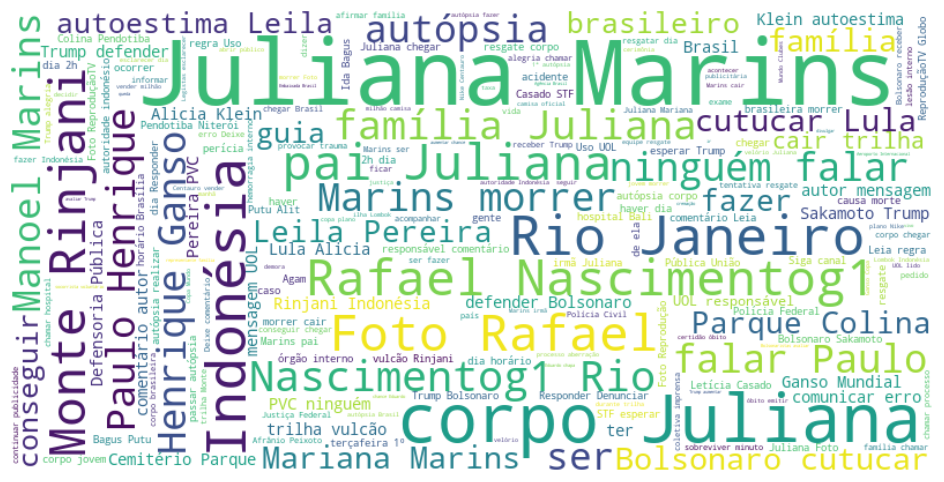

In [42]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

complete_text = ' '.join(frame_processed['processed_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(complete_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()